In [8]:
# 미설치 환경에서는 다음 명령의 실행이 필요합니다.
# %pip install deepface
# %pip install mediapipe
# %conda install -c conda-forge dlib
# %pip install openpyxl

1. 윈도우 기준, `C:/Users/<유저명>/.conda/envs/<conda 환경명>/Lib/site-packages/deepface/DeepFace.py` 674번째 줄에 아래 코드를 추가해야 원활하게 작동합니다.(input shape를 맞춰주기 위한 코드입니다.)
    맥에서도 conda 환경을 모은 곳에서 `Lib/site-packages/deepface/DeepFace.py` 파일을 확인하면 될 것으로 추측됩니다.
    ```
    if model_name == 'DeepID':
        img = np.transpose(img, (0, 2, 1, 3)) 
    ```

2. dlib의 경우 gdown을 통한 데이터 다운로드의 실패하는 경우가 있습니다. 이 경우 가중치 파일을 윈도우 기준으로, 아래 디렉토리에 넣으면 됩니다.
- `C:/Users/<유저명>/.deepface/weights`

    맥의 경우에도 `.deepface/weights`의 형태로 가중치 파일을 다운받는 위치가 있을 것으로 추측됩니다.
- dlib이 사용하는 dat 파일은 https://github.com/ageitgey/face_recognition_models/raw/master/face_recognition_models/models/dlib_face_recognition_resnet_model_v1.dat 를 통해 다운받을 수 있습니다.

In [9]:
import pandas as pd

# 데이터셋 경로입니다. 맞춰주시면 됩니다.
xlsx_path = "AI_DATA_edit_labeled.xlsx"

df = pd.read_excel(xlsx_path)
df

,id,sex,auth,profiles,"labeled_result_value(0: 미인증, 2: 인증)"
0,12,여성,https://sinor.s3.ap-northeast-2.amazonaws.com/...,https://sinor.s3.ap-northeast-2.amazonaws.com/...,0
1,13,여성,https://sinor.s3.ap-northeast-2.amazonaws.com/...,https://sinor.s3.ap-northeast-2.amazonaws.com/...,0
2,11,여성,https://sinor.s3.ap-northeast-2.amazonaws.com/...,https://sinor.s3.ap-northeast-2.amazonaws.com/...,0
3,9,여성,https://sinor.s3.ap-northeast-2.amazonaws.com/...,https://sinor.s3.ap-northeast-2.amazonaws.com/...,0
4,25,남자,https://sinor.s3.ap-northeast-2.amazonaws.com/...,https://sinor.s3.ap-northeast-2.amazonaws.com/...,0
...,...,...,...,...,...
968,2423,남자,https://sinor.s3.ap-northeast-2.amazonaws.com/...,https://sinor.s3.ap-northeast-2.amazonaws.com/...,0
969,2490,남자,https://sinor.s3.ap-northeast-2.amazonaws.com/...,https://sinor.s3.ap-northeast-2.amazonaws.com/...,0
970,2641,남자,https://sinor.s3.ap-northeast-2.amazonaws.com/...,https://sinor.s3.ap-northeast-2.amazonaws.com/...,0
971,2715,남자,https://sinor.s3.ap-northeast-2.amazonaws.com/...,https://sinor.s3.ap-northeast-2.amazonaws.com/...,0


In [10]:
## 수정 필요 ##

# models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib", "SFace"]
models = ["VGG-Face", "Facenet512", "arcface"] # 이 부분을 두 모델의 리스트로 변경하면 됩니다.
metrics = ["cosine", "euclidean", "euclidean_l2"]

In [11]:
#최대 프로필사진 수 구하기
# print(df['profiles'].apply(lambda x: x.count(',')).max() + 1)

In [12]:
# from deepface import DeepFace

# result = DeepFace.verify('../temp/auth_19351675822454273.jpg', '../temp/profiles_1675822458972.jpg', detector_backend='mediapipe', model_name=models[0])

In [13]:
import sys, os
import pandas as pd

path_to_AI16CP2 = '../../AI_16_CP2'
sys.path.insert(0, path_to_AI16CP2)

In [14]:
from face_ds_project import FaceDSProject

project = FaceDSProject(model_name='vggface', distance_metric='euclidean')

# project.verifier.model.load_weights('vggface_weights/vggface_weights_10.h5')

Num GPUs Available:  1


In [15]:
source1 = '../AI_16_CP2/sample_data/ls.jpg'
# results = []
# for i in os.listdir('../../AI_16_CP2/sample_data'):
#     if 'jpg' in i:
#         print(i, project.verify(source1, '../AI_16_CP2/sample_data/'+ i))
#         results.append(project.verify(source1, '../AI_16_CP2/sample_data/'+ i))
project.verify(source1, source1)


1/1 [==============================] - 0s 58ms/step


{'result_message': '동일인이 존재합니다.',
 'result_code': 2,
 'result_list': [[0.80755496,
   0.7824107,
   0.70786244,
   0.7173524,
   0.62690395,
   0.7344276],
  [0.7824107, 0.80755496, 0.71682227, 0.7138875, 0.63046426, 0.7449332],
  [0.70786244, 0.71682227, 0.80755496, 0.7002028, 0.7299451, 0.7240352],
  [0.7173524, 0.7138875, 0.7002028, 0.80755496, 0.66395426, 0.6568353],
  [0.62690395, 0.63046426, 0.7299451, 0.66395426, 0.80755496, 0.6335187],
  [0.7344276, 0.7449332, 0.7240352, 0.6568353, 0.6335187, 0.80755496]],
 'origin': [array([[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         ...,
  
         [[0, 0, 0

In [16]:

import time
from IPython.display import clear_output

def get_verification_result(x, model, distance_metric, threshold= 0.5):
    """
    df row와 모델명을 가지고 DeepFace객체로 verification 결과를 반환함. 순서에 유의할 것.
    """
    images = x['profiles'].split(',')
    source = x['auth']
    
    # facial_areas_values = []
    
    time_values = []
    valid_times = []
    average_valid_time = '(No Face)'

    verified = False
    verified_values = []
    result_list = []


    clear_output()
    for imageUrl in images:
        target = imageUrl
        start_time = time.time()
        result_set = ''
        result_code = ''
        elapsed_time = ''
        try:
            result_set = project.verify(source, target, threshold)
            result_code = result_set['result_code']
            if result_code >= 0:
                result_list.append(result_set['result_list'])
            finished_time = time.time()
            elapsed_time = round(finished_time - start_time, 6)
            valid_times.append(elapsed_time)
        except TypeError as e:
            print(e)
            finished_time = time.time()
            elapsed_time = round(finished_time - start_time, 6)
        
        time_values.append(elapsed_time)

        if result_code == 2:
            verified = True
            verified_values.append(2)
        else:
            verified_values.append(0)
            
    if len(valid_times) != 0:
        average_valid_time = sum(valid_times) / len(valid_times)
    return model + "샴네트워크", threshold, distance_metric, time_values, average_valid_time, result_list, verified, verified_values

In [17]:
from tqdm import tqdm

tqdm.pandas()


df_test = df[0:10].copy()  
df_test[['model', 'threshold', 'similarity_metric', 'time_values(초)', '평균유효시간', '유사도3d리스트(유사하면 1에 가까움)', 'verified', 'verified_values']] = df_test.progress_apply(
    lambda x: pd.Series(get_verification_result(x, models[0], metrics[1])),  axis=1)

df_test

100%|██████████| 10/10 [00:15<00:00,  1.56s/it]


,id,sex,auth,profiles,"labeled_result_value(0: 미인증, 2: 인증)",model,threshold,similarity_metric,time_values(초),평균유효시간,유사도3d리스트(유사하면 1에 가까움),verified,verified_values
0,12,여성,https://sinor.s3.ap-northeast-2.amazonaws.com/...,https://sinor.s3.ap-northeast-2.amazonaws.com/...,0,VGG-Face샴네트워크,0.5,euclidean,[0.909999],0.909999,[],False,[0]
1,13,여성,https://sinor.s3.ap-northeast-2.amazonaws.com/...,https://sinor.s3.ap-northeast-2.amazonaws.com/...,0,VGG-Face샴네트워크,0.5,euclidean,[1.704999],1.704999,[],False,[0]
2,11,여성,https://sinor.s3.ap-northeast-2.amazonaws.com/...,https://sinor.s3.ap-northeast-2.amazonaws.com/...,0,VGG-Face샴네트워크,0.5,euclidean,[0.583001],0.583001,[],False,[0]
3,9,여성,https://sinor.s3.ap-northeast-2.amazonaws.com/...,https://sinor.s3.ap-northeast-2.amazonaws.com/...,0,VGG-Face샴네트워크,0.5,euclidean,[3.018],3.018000,[],False,[0]
4,25,남자,https://sinor.s3.ap-northeast-2.amazonaws.com/...,https://sinor.s3.ap-northeast-2.amazonaws.com/...,0,VGG-Face샴네트워크,0.5,euclidean,[1.282001],1.282001,[],False,[0]
5,36,남자,https://sinor.s3.ap-northeast-2.amazonaws.com/...,https://sinor.s3.ap-northeast-2.amazonaws.com/...,0,VGG-Face샴네트워크,0.5,euclidean,[1.014],1.014000,[],False,[0]
6,37,남자,https://sinor.s3.ap-northeast-2.amazonaws.com/...,https://sinor.s3.ap-northeast-2.amazonaws.com/...,2,VGG-Face샴네트워크,0.5,euclidean,"[1.674001, 1.289999]",1.482000,"[[[0.50004154]], [[0.66287595]]]",True,"[2, 2]"
7,40,여성,https://sinor.s3.ap-northeast-2.amazonaws.com/...,https://sinor.s3.ap-northeast-2.amazonaws.com/...,0,VGG-Face샴네트워크,0.5,euclidean,[0.696996],0.696996,[],False,[0]
8,41,여성,https://sinor.s3.ap-northeast-2.amazonaws.com/...,https://sinor.s3.ap-northeast-2.amazonaws.com/...,0,VGG-Face샴네트워크,0.5,euclidean,[1.152],1.152000,[],False,[0]
9,42,남자,https://sinor.s3.ap-northeast-2.amazonaws.com/...,https://sinor.s3.ap-northeast-2.amazonaws.com/...,0,VGG-Face샴네트워크,0.5,euclidean,[2.225998],2.225998,[],False,[0]


In [18]:
# filename = 'test_deepface_AI_DATA_10ONLY.xlsx'
# df_test.to_excel(filename, index=False)

In [19]:
for i in os.listdir('vggface_weights'):
    if 'h5' in i:
        print(i)

vggface_weights_01-0.606.h5
vggface_weights_02-0.617.h5
vggface_weights_03-0.629.h5
vggface_weights_04-0.633.h5
vggface_weights_05-0.649.h5
vggface_weights_06-0.647.h5
vggface_weights_07-0.650.h5
vggface_weights_08.h5
vggface_weights_09.h5
vggface_weights_10.h5


In [20]:
# # 데이터프레임 각 행별로 verification함수를 돌린 후 각 모델별 파일명으로 엑셀 익스포트함.
# from IPython.display import clear_output
# import openpyxl

# filename = 'test_16model_AI_DATA_epoch9.xlsx'


# # 워크북 생성
# wb = openpyxl.Workbook()

# # 기본 시트가 없으면 새로운 시트를 추가합니다.
# if not wb.worksheets:
#     wb.create_sheet("Sheet1")


# # 워크북을 저장합니다.
# wb.save(filename)

# dir_name = 'vggface_weights/'
        
# # 엑셀 파일 생성
# with pd.ExcelWriter(filename, mode="a") as writer:
#     for idx, i in enumerate(os.listdir('vggface_weights')):
#         if 'h5' in i and idx >3:
#             project.verifier.model.load_weights(os.path.join(dir_name, i))
#             df_verified = df.copy()
#             df_verified[['model', 'threshold', 'similarity_metric', 'time_values(초)', '평균유효시간', '유사도2d리스트(유사하면 1에 가까움)', 'verified', 'verified_values']] = df.progress_apply(
#                 lambda x: pd.Series(get_verification_result(x, models[0], metrics[1])),  axis=1)
            
#             sheet_name = i
            
#             # 각 데이터프레임을 엑셀 시트에 쓰기
#             df_verified.to_excel(writer, sheet_name=sheet_name, index=False)

In [21]:
# # 데이터프레임 각 행별로 verification함수를 돌린 후 각 모델별 파일명으로 엑셀 익스포트함.
# from IPython.display import clear_output
# import openpyxl

# filename = 'test_16model_AI_DATA_epoch9.xlsx'


# # 워크북 생성
# wb = openpyxl.Workbook()

# # 기본 시트가 없으면 새로운 시트를 추가합니다.
# if not wb.worksheets:
#     wb.create_sheet("Sheet1")


# # 워크북을 저장합니다.
# wb.save(filename)

# dir_name = 'vggface_weights/'
# i = 'vggface_weights_09.h5'

# # 엑셀 파일 생성
# with pd.ExcelWriter(filename, mode="a") as writer:
#     project.verifier.model.load_weights(os.path.join(dir_name, i))
#     df_verified = df.copy()
#     df_verified[['model', 'threshold', 'similarity_metric', 'time_values(초)', '평균유효시간', '유사도3d리스트(유사하면 1에 가까움)', 'verified', 'verified_values']] = df.progress_apply(
#         lambda x: pd.Series(get_verification_result(x, models[0], metrics[1])),  axis=1)
    
#     sheet_name = i
    
#     # 각 데이터프레임을 엑셀 시트에 쓰기
#     df_verified.to_excel(writer, sheet_name=sheet_name, index=False)

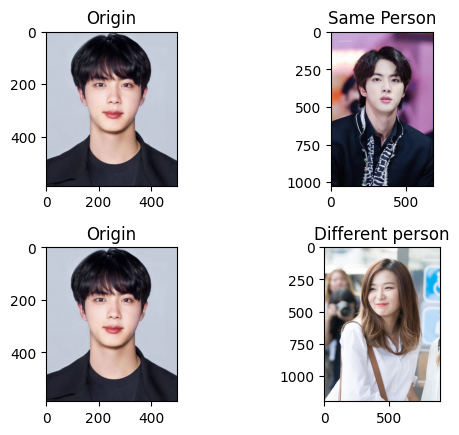

1/1 [==============================] - 0s 35ms/step
결과 메세지 :  동일인이 존재합니다.  결과 값 :  2
유사도 :  [[0.6978933]]
1/1 [==============================] - 0s 40ms/step
결과 메세지 :  동일인이 존재하지 않습니다.  결과 값 :  0
유사도 :  [[0.4275785]]


In [22]:
import matplotlib.pyplot as plt
from utils.function.generals import load_image
def plot_pairs(img1, img2, img3, img4):
    # 첫번째 이미지
    plt.subplot(2, 2, 1)
    plt.imshow(img1)
    plt.title('Origin')

    # 두번째 이미지
    plt.subplot(2, 2, 2)
    plt.imshow(img2)
    plt.title('Same Person')
    
    # 첫번째 이미지
    plt.subplot(2, 2, 3)
    plt.imshow(img3)
    plt.title('Origin')

    # 두번째 이미지
    plt.subplot(2, 2, 4)
    plt.imshow(img4)
    plt.title('Different person')

    # subplot 간격 조절
    plt.subplots_adjust(hspace=0.4)

    # 이미지 플롯 보여주기
    plt.show()
    # input('Press Enter to continue...')

img00 = '../AI_16_CP2/sample_data/s3.jpg'
img01 = '../AI_16_CP2/sample_data/s3_2.jpg'
img10 = '../AI_16_CP2/sample_data/s2.jpg'

plot_pairs(load_image(img00, '../'), load_image(img01, '../'), load_image(img00, '../'), load_image(img10, '../'))

result1 = project.verify(img00, img01)
print('결과 메세지 : ', result1['result_message'], ' 결과 값 : ', result1['result_code'])
print('유사도 : ', result1['result_list'])
result2 = project.verify(img00, img10)
print('결과 메세지 : ', result2['result_message'], ' 결과 값 : ', result2['result_code'])
print('유사도 : ', result2['result_list'])

In [27]:
s8 = '../AI_16_CP2/sample_data/s8.jpg'
s1 = '../AI_16_CP2/sample_data/s1.jpg'
print(project.distinguish(s8))
print(project.distinguish(s1))

1/1 [==============================] - 0s 23ms/step
{'result_message': '원본 이미지에서 성별을 분석했습니다.', 'result_code': 0, 'result_list': [{'gender': {'Woman': 0.0, 'Man': 100.0}, 'dominant_gender': 'Man'}]}
1/1 [==============================] - 0s 24ms/step
{'result_message': '원본 이미지에서 성별을 분석했습니다.', 'result_code': 0, 'result_list': [{'gender': {'Woman': 100.0, 'Man': 0.0}, 'dominant_gender': 'Woman'}]}


1/1 [==============================] - 0s 40ms/step


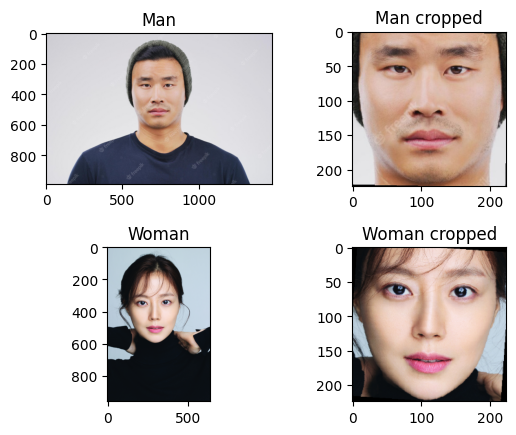

In [30]:
def plot_genders(img1, img2, result1, img3, img4, result2):
    # 첫번째 이미지
    plt.subplot(2, 2, 1)
    plt.imshow(img1)
    plt.title((result1['result_list'][0]['dominant_gender']))

    # 두번째 이미지
    plt.subplot(2, 2, 2)
    plt.imshow(img2)
    plt.title((result1['result_list'][0]['dominant_gender'] + ' cropped'))
    
    # 첫번째 이미지
    plt.subplot(2, 2, 3)
    plt.imshow(img3)
    plt.title((result2['result_list'][0]['dominant_gender']))

    # 두번째 이미지
    plt.subplot(2, 2, 4)
    plt.imshow(img4)
    plt.title((result2['result_list'][0]['dominant_gender'] + ' cropped'))

    # subplot 간격 조절
    plt.subplots_adjust(hspace=0.4)

    # 이미지 플롯 보여주기
    plt.show()

result_m = project.distinguish(s8)
result_w = project.distinguish(s1)
plot_genders(load_image(s8, '../'), project.get_faces(s8)[0], result_m, load_image(s1, '../'), project.get_faces(s1)[0], result_w)